In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import re
import random
import operator
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from func import *

# inline plot
%matplotlib inline

In [47]:
#%load 'data/raw-twt2016-01-26-14/21/09.csv'
df = pd.read_csv("data/raw-twt2016-01-26-14-21-09.csv",sep='\t',error_bad_lines=False)
df.describe()

,Unnamed: 0,favorite_count,favorited,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,truncated
count,3199.000000,1509.000000,3199,3.199000e+03,1.270000e+03,1.300000e+03,1946.000000,3199,3199
mean,1599.000000,3.513585,0,6.484877e+17,6.474381e+17,6.174353e+08,18.703494,0,0
std,923.616082,6.693903,0,2.243800e+16,2.323574e+16,1.026750e+09,467.130516,0,0
min,0.000000,1.000000,False,6.069953e+17,6.069949e+17,3.632000e+03,1.000000,False,False
25%,799.500000,1.000000,0,6.308106e+17,6.265296e+17,2.001160e+07,1.000000,0,0
50%,1599.000000,2.000000,0,6.497296e+17,6.494642e+17,1.069600e+08,3.000000,0,0
75%,2398.500000,3.000000,0,6.664330e+17,6.626031e+17,5.472453e+08,4.000000,0,0
max,3198.000000,116.000000,False,6.920826e+17,6.920673e+17,4.265436e+09,18479.000000,False,False


Cleanin' the data

In [48]:
# Fill in blank hashtags
df["hashtags"].fillna('')

# Add some date/time things
df["created_at"] = pd.to_datetime(df["created_at"], coerce=True)
df["day_of_week"] = df["created_at"].apply(lambda x: x.weekday())
df["month"] = df["created_at"].apply(lambda x: x.month)
df["time_of_day"] = df["created_at"].apply(lambda x: get_time_of_day(x))


df["hashtags"].fillna('')
df["hashtags"] = df["hashtags"].apply(lambda x: str(x)[1:-1])

/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


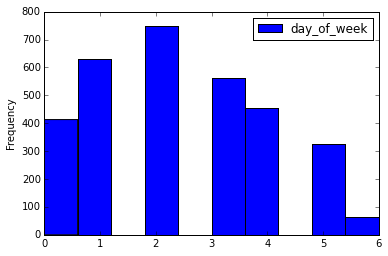

In [25]:
df.plot(x='created_at', y='day_of_week', kind='hist')
# fdf = df[["created_at","id","text","hashtags"]]
# str(fdf

In [49]:
df["hashtags"].head(5)
df["hashtags"]

0         SanFrancisco
1                    a
2                 SB50
3    Sorry, Headphones
4                    a
Name: hashtags, dtype: object